In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sklearn.metrics

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [28]:
print("Для того, чтобы зафиксировать генерацию случайных чисел от запуска к запуску и получать консистентный результат.")

Для того, чтобы зафиксировать генерацию случайных чисел от запуска к запуску и получать консистентный результат.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [61]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [11]:
# 10 случайных строк тренировочного датасета
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
2017,Maruti Swift Dzire VXi,2009,240000,120000,Petrol,Individual,Manual,First Owner,17.5 kmpl,1298 CC,85.8 bhp,114Nm@ 4000rpm,5.0
6348,Maruti Swift AMT VDI,2018,790000,16000,Diesel,Dealer,Automatic,First Owner,28.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
191,Datsun GO T BSIV,2017,329000,80000,Petrol,Individual,Manual,Second Owner,20.63 kmpl,1198 CC,67 bhp,104Nm@ 4000rpm,5.0
304,Maruti Swift VXI BSIV,2018,610000,52000,Petrol,Dealer,Manual,First Owner,22.0 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
2184,Honda Amaze VX i-DTEC,2018,825000,40000,Diesel,Individual,Manual,First Owner,25.8 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4111,Maruti Alto LXi BSIII,2010,132000,105000,Petrol,Individual,Manual,First Owner,19.7 kmpl,796 CC,46.3 bhp,62Nm@ 3000rpm,5.0
272,Honda City i-DTEC VX,2017,1300000,30000,Diesel,Individual,Manual,First Owner,25.6 kmpl,1498 CC,97.9 bhp,200Nm@ 1750rpm,5.0
3043,Hyundai Grand i10 1.2 CRDi Sportz,2017,450000,56290,Diesel,Dealer,Manual,First Owner,24.0 kmpl,1186 CC,73.97 bhp,190.24nm@ 1750-2250rpm,5.0
2362,Maruti Swift Dzire VDI,2017,570000,120000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
3169,Hyundai i20 Sportz 1.4 CRDi,2014,420000,50000,Diesel,Individual,Manual,First Owner,22.54 kmpl,1396 CC,88.73 bhp,219.7Nm@ 1500-2750rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [15]:
# первые 5 объектов тестового датасета
df_test[:5]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [16]:
# последние 5 объектов тестового датасета
df_test[-5:]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [21]:
# основные статистики по числовым и по категориальным столбцам для тренировочного датасета
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [19]:
# основные статистики по числовым и по категориальным столбцам для тестового датасета
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [33]:
# получение названий колонок, которые содержат пропуски в тренировочном датасете
df_train.columns[df_train.isna().any()].values

array(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype=object)

In [34]:
# получение названий колонок, которые содержат пропуски в тестовом датасете
df_test.columns[df_test.isna().any()].values

array(['mileage', 'engine', 'max_power', 'torque', 'seats'], dtype=object)

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [43]:
# количество объектов с одинаковым описанием без учета целевой переменной (стоимости)
df_train.loc[:, df_train.columns != "selling_price"].duplicated().sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [51]:
# объекты с одинаковым описанием без учета целевой переменной (стоимости)
df_train[df_train.loc[:, df_train.columns != "selling_price"].duplicated()].sort_values(by=["name"])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [62]:
# удаление повторяющихся строк
columns = df_train.columns.values.tolist()
columns.remove("selling_price")
df_train.drop_duplicates(subset=columns, keep="first", inplace=True)

In [63]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [64]:
# обновление индексов строк
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [65]:
df_train["mileage"] = df_train["mileage"].str.extract('(\d+.\d+)').astype(float)
df_test["mileage"] = df_test["mileage"].str.extract('(\d+.\d+)').astype(float)

In [66]:
df_train["engine"] = df_train["engine"].str.extract('(\d+.\d+)').astype(float)
df_test["engine"] = df_test["engine"].str.extract('(\d+.\d+)').astype(float)

In [67]:
df_train["max_power"] = df_train["max_power"].str.extract('(\d+.\d+)').astype(float)
df_test["max_power"] = df_test["max_power"].str.extract('(\d+.\d+)').astype(float)

In [68]:
import re
# получение максимальных значений RPM
rpm_values = df_train["torque"].str.extract("(\d+)\s*rpm|(\d{1}\d+)\s*\(", flags=re.IGNORECASE).astype(float)
df_train["max_torque_rpm"] = rpm_values[0].fillna(rpm_values[1])

rpm_values = df_test["torque"].str.extract("(\d+)\s*rpm|(\d{1}\d+)\s*\(", flags=re.IGNORECASE).astype(float)
df_test["max_torque_rpm"] = rpm_values[0].fillna(rpm_values[1])

In [69]:
df_train.drop('torque', axis=1, inplace=True)
df_test.drop('torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [70]:
# заполнение пропусков медианными значениями
df_test = df_test.fillna(df_test.median(numeric_only=True))
df_train = df_train.fillna(df_train.median(numeric_only=True))

In [71]:
# проверка, что пропусков не осталось
df_test.columns[df_test.isna().any()].values

array([], dtype=object)

In [72]:
# проверка, что пропусков не осталось
df_train.columns[df_test.isna().any()].values

array([], dtype=object)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [290]:
print("Потому что количество мест в автомобиле представляет собой очень ограниченное количество возможных значений (категорию или группу значений). При OneHot кодировании не будет создано большое количество новых столбцов.")

Потому что количество мест в автомобиле представляет собой очень ограниченное количество возможных значений (категорию или группу значений). При OneHot кодировании не будет создано большое количество новых столбцов.


In [73]:
# преобразование значений в столбце `engine` к целому числу
df_test["engine"] = df_test["engine"].astype("int")
# преобразование значений в столбце `seats` к целому числу
df_test["seats"] = df_test["seats"].astype("int")

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

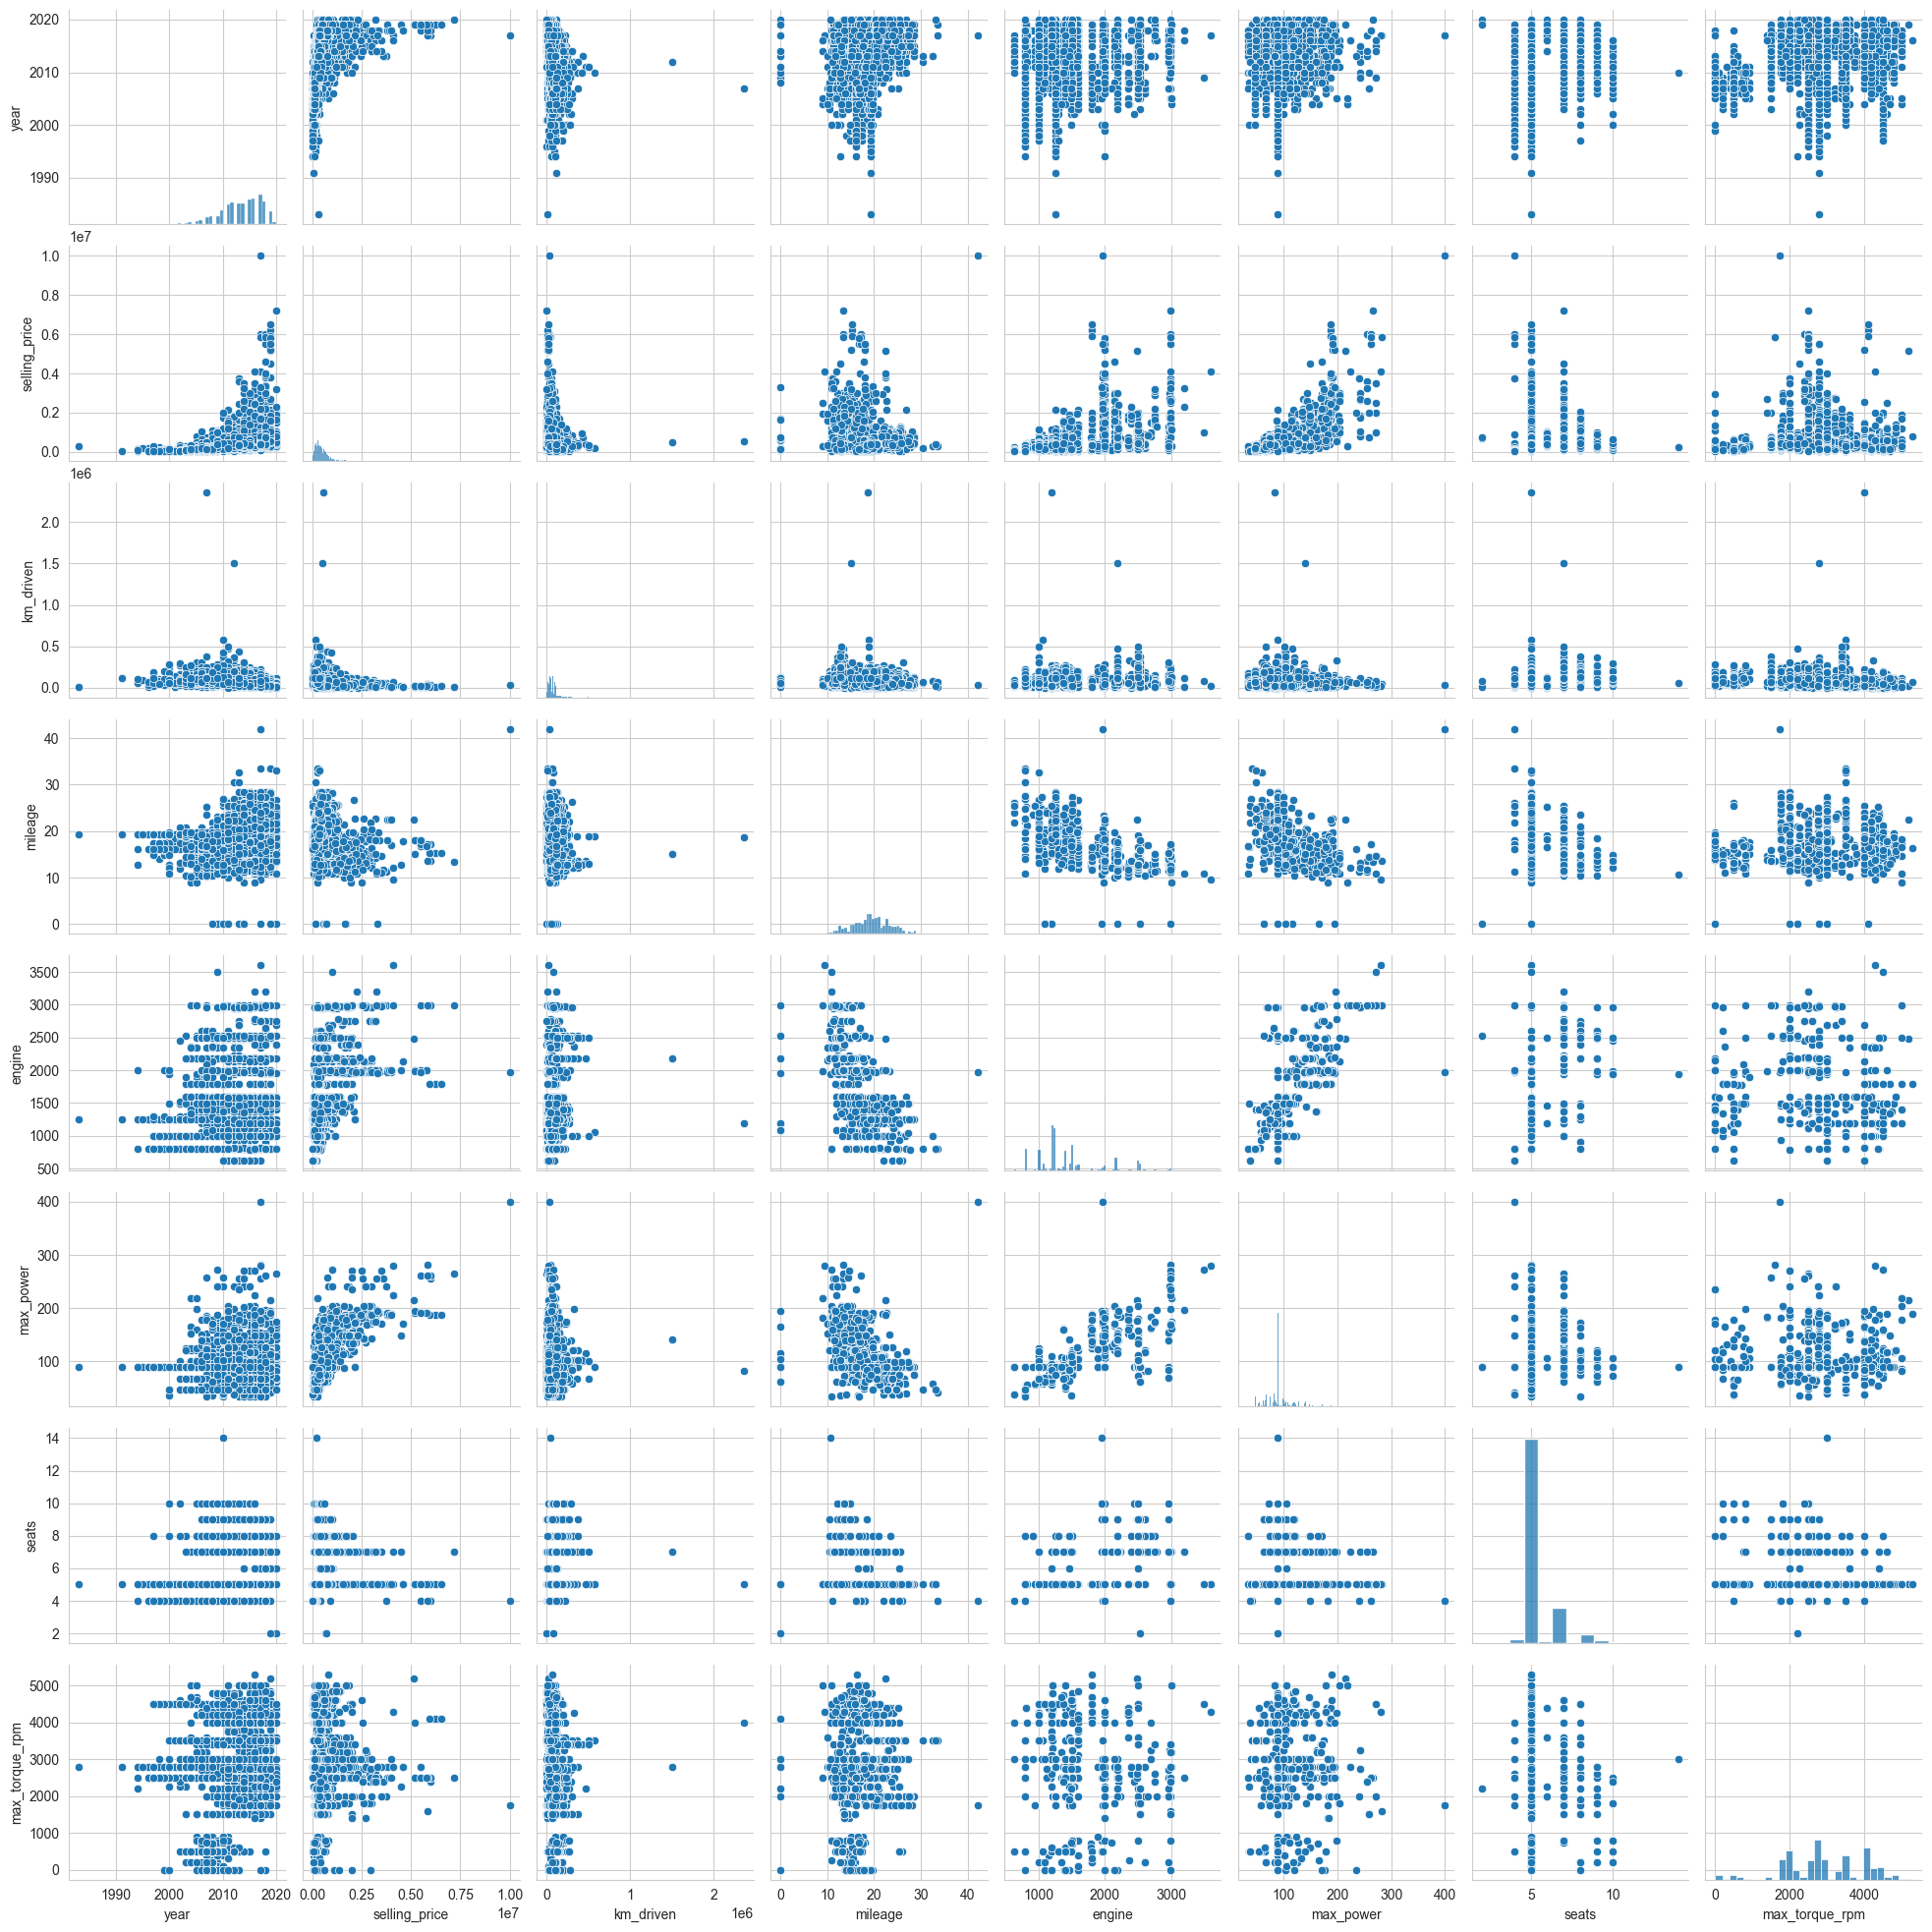

In [91]:
# попарные распределения числовых признаков для тренировочного датасета
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ**
По графикам видно, что чем выше цена, тем автомобили более мощные и новые.
Также, например, можно заметить, что более мощные автомобили имеют меньший пробег по сравнению с менее мощными.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

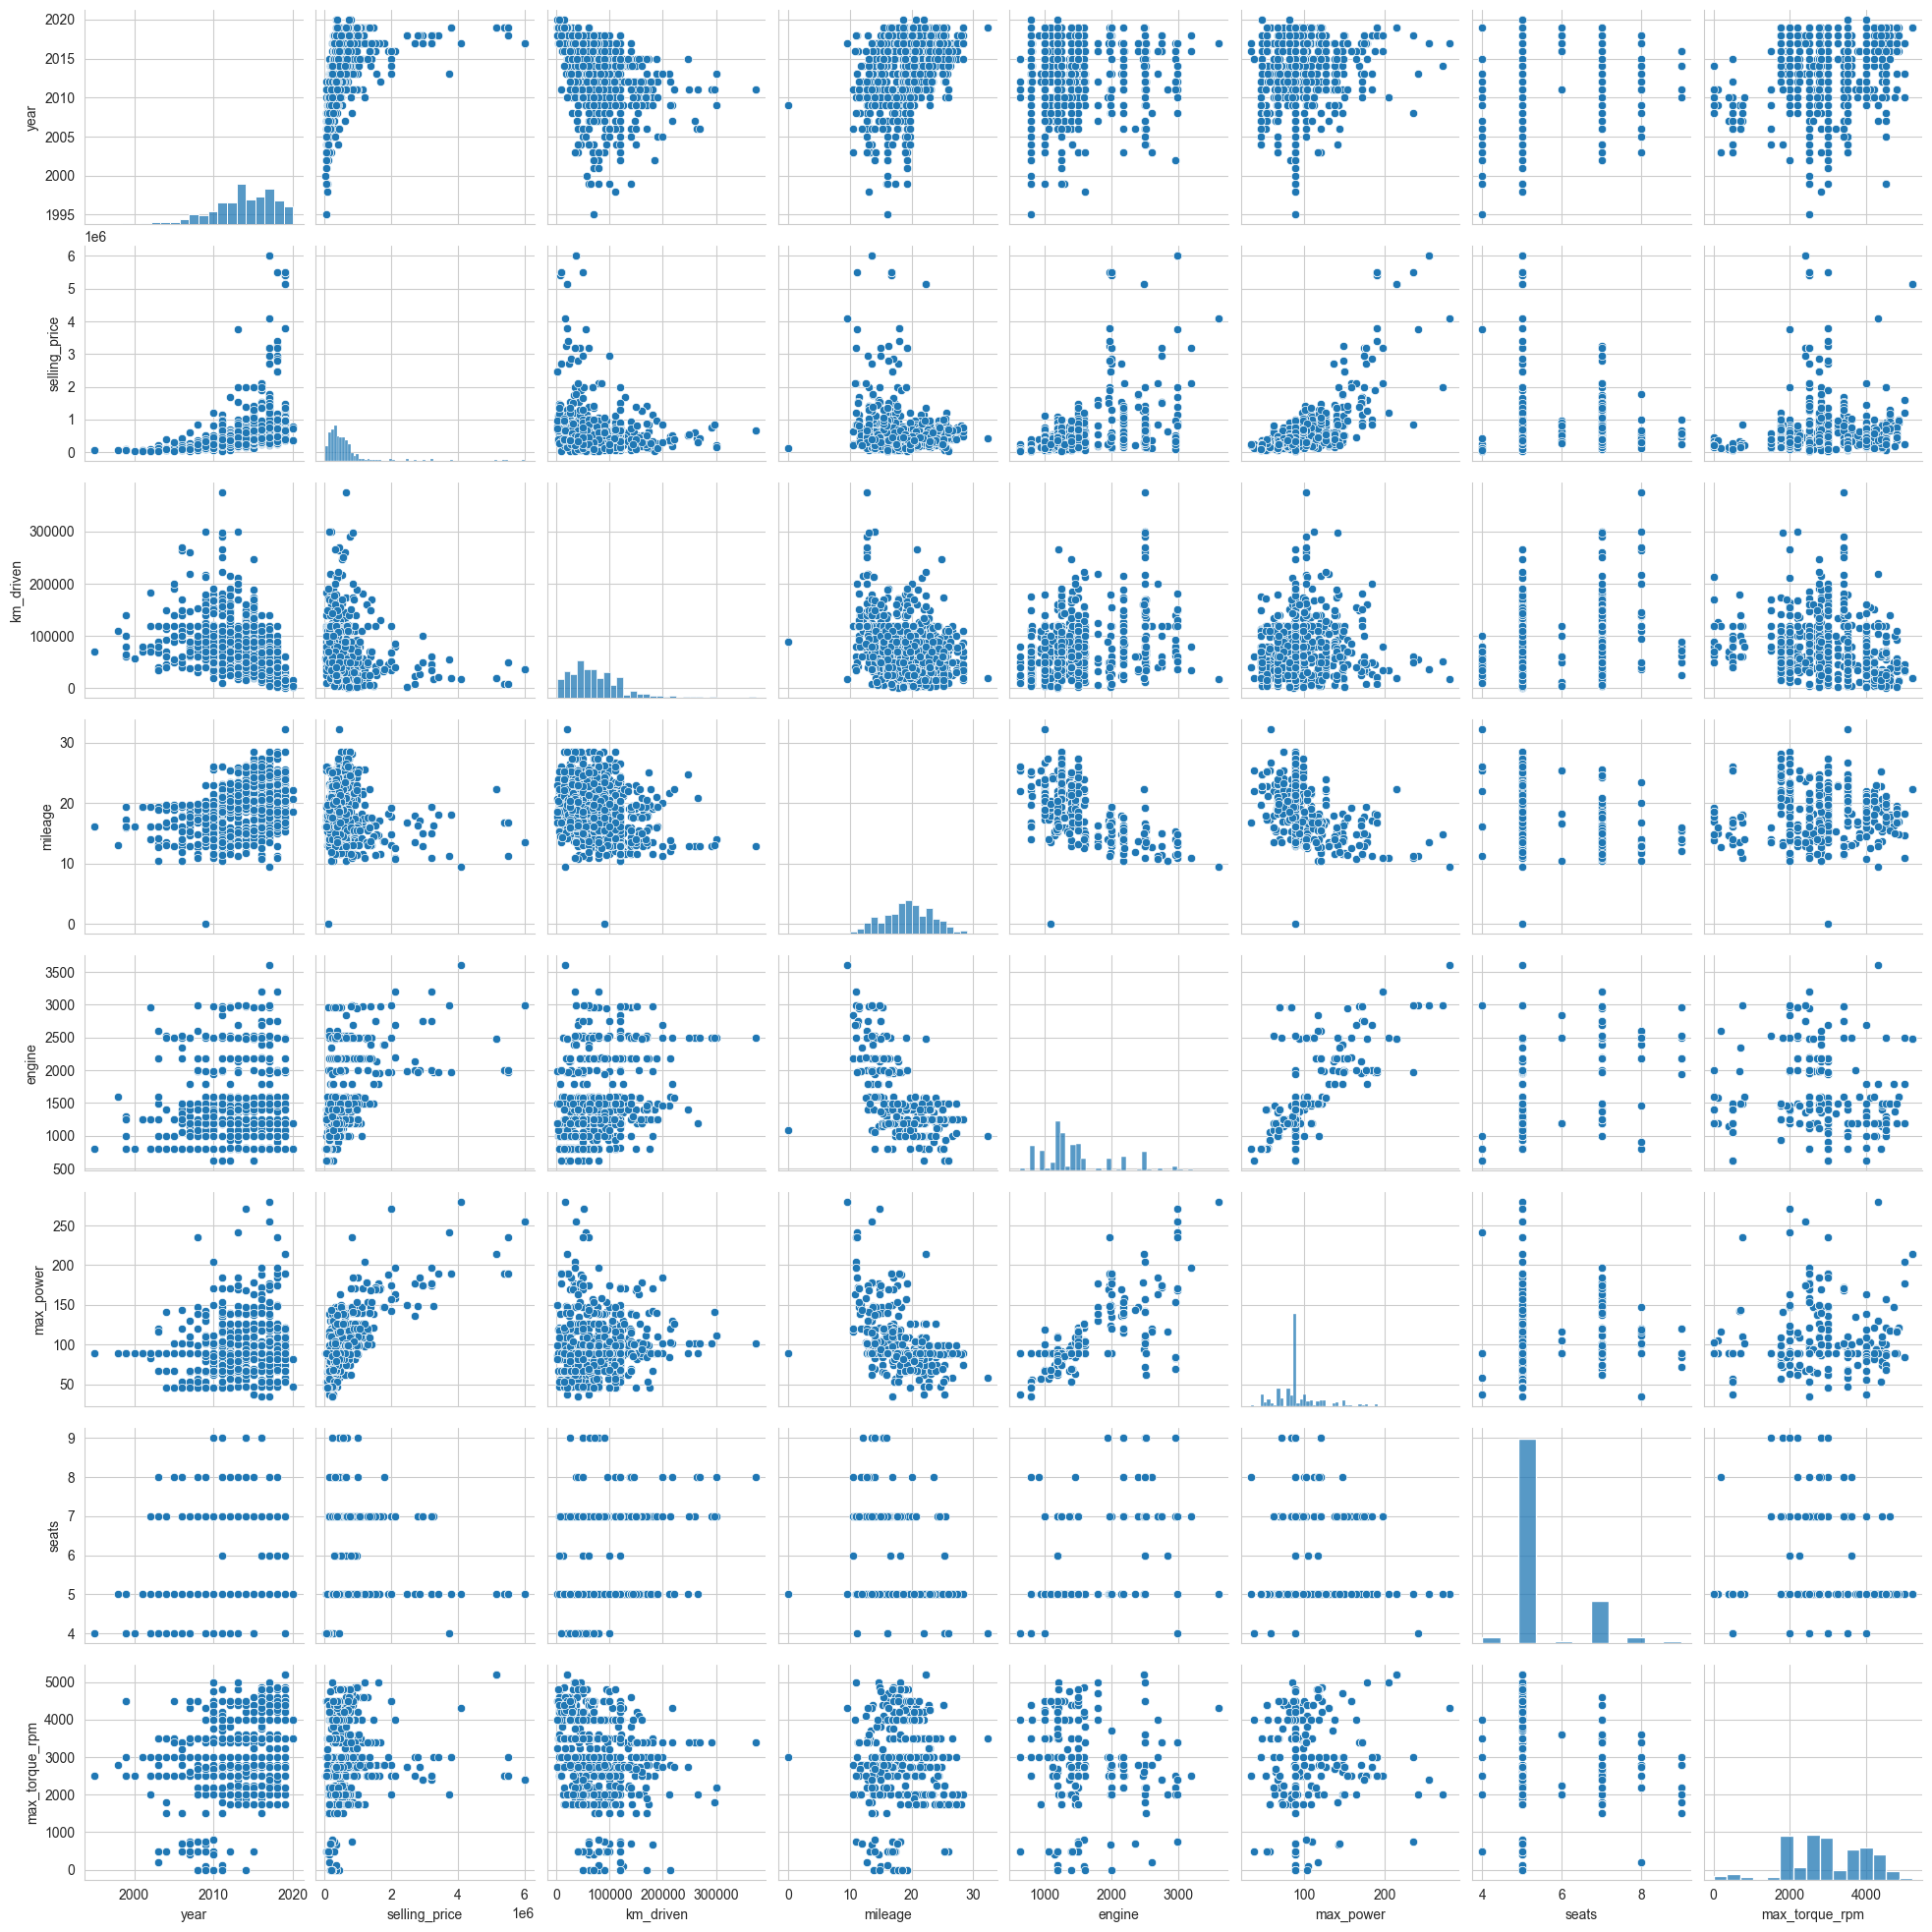

In [92]:
# попарные распределения числовых признаков для тестового датасета
sns.pairplot(df_test)

**Ответ**
Да, в среднем графики для трейн и тест похожи. То есть общий паттерн взаимозависимостей похож.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

,year,selling_price,km_driven,mileage,engine,max_power,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.068216,0.041178,0.216184
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.671681,0.149953,0.000264
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.044573,0.192328,-0.233063
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.409741,-0.451059,-0.055821
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.674636,0.652172,-0.218894
max_power,0.068216,0.671681,0.044573,-0.409741,0.674636,1.000000,0.227490,-0.071209
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.227490,1.000000,-0.149497
max_torque_rpm,0.216184,0.000264,-0.233063,-0.055821,-0.218894,-0.071209,-0.149497,1.000000


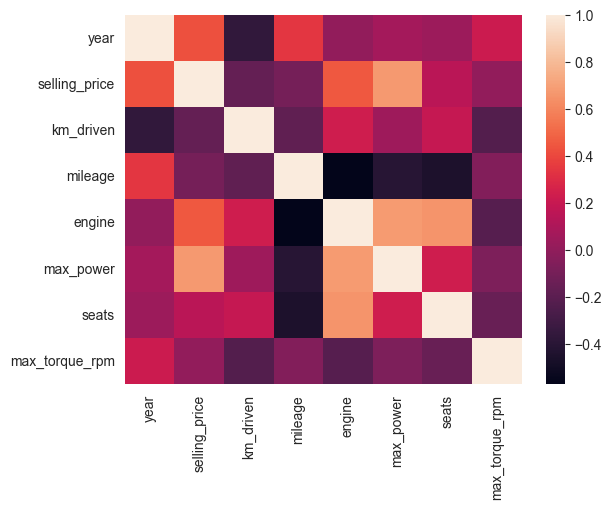

In [93]:
# тепловая карта попарных корреляций числовых колонок
sns.heatmap(df_train.corr(numeric_only=True))
df_train.corr(numeric_only=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ**
1. Наименее коррелирующие признаки: `mileage` и `engine`.
2. Между признаками (`max_power` и `engine`), (`max_power` и `selling_price`), (`seats` и `engine`)  наблюдается сильная положительная линейная зависимость.
3. Так утверждать не правильно, т.к. корреляция между признаками `year` и `km_driven` очень слабая.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot: xlabel='max_power', ylabel='engine'>

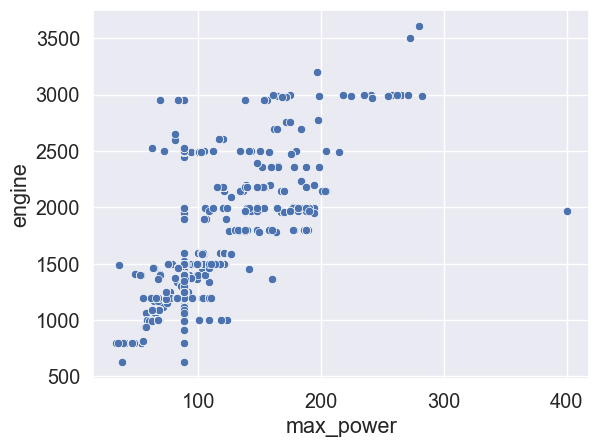

In [69]:
# диаграмма рассеяния для наиболее коррелирующих признаков
sns.scatterplot(
    x="max_power",
    y="engine",
    data=df_train,
)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot: xlabel='max_power', ylabel='selling_price'>

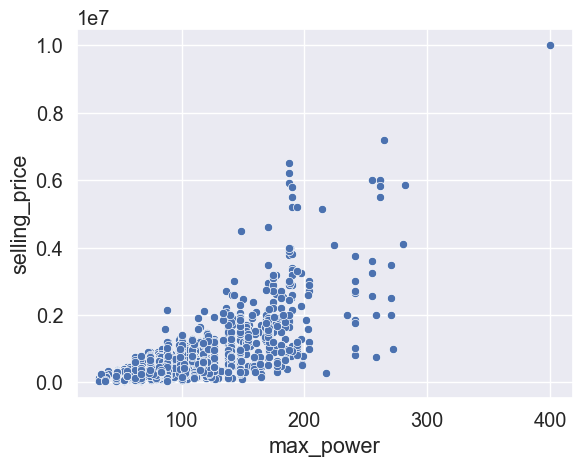

In [70]:
# диаграмма рассеяния для `max_power` и `selling_price`
sns.scatterplot(
    x="max_power",
    y="selling_price",
    data=df_train,
)

<AxesSubplot: xlabel='seats', ylabel='engine'>

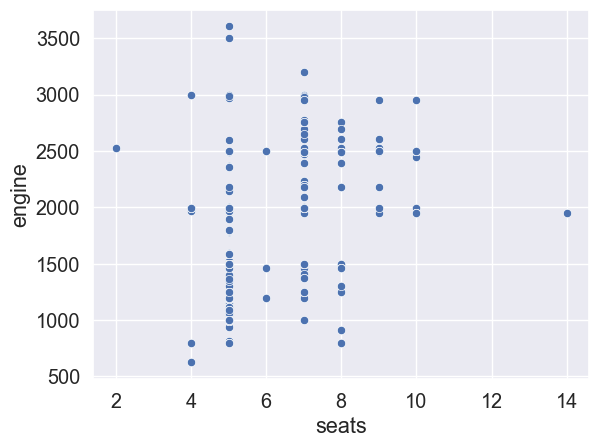

In [71]:
# диаграмма рассеяния для `seats` и `engine`
sns.scatterplot(
    x="seats",
    y="engine",
    data=df_train,
)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [94]:
y_train = df_train["selling_price"]

train = df_train.select_dtypes([np.number])
X_train = train.drop("selling_price", axis=1)

In [95]:
# был добавлен новый столбец - `max_torque_rpm`
assert X_train.shape == (5840,7)
X_train

,year,km_driven,mileage,engine,max_power,seats,max_torque_rpm
0,2014,145500,23.40,1248.0,88.50,5.0,2000.0
1,2014,120000,21.14,1498.0,103.52,5.0,2500.0
2,2010,127000,23.00,1396.0,88.50,5.0,2750.0
3,2007,120000,16.10,1298.0,88.20,5.0,500.0
4,2017,45000,20.14,1197.0,81.86,5.0,4000.0
...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086.0,62.10,5.0,3000.0
5836,2013,50000,18.90,998.0,67.10,5.0,3500.0
5837,2013,110000,18.50,1197.0,82.85,5.0,4000.0
5838,2007,119000,16.80,1493.0,110.00,5.0,750.0


In [96]:
y_test = df_test["selling_price"]

test = df_test.select_dtypes([np.number])
X_test = test.drop("selling_price", axis=1)

In [97]:
# был добавлен новый столбец - `max_torque_rpm`
assert X_test.shape == (1000, 7)
X_test

,year,km_driven,mileage,engine,max_power,seats,max_torque_rpm
0,2010,168000,14.00,2498,112.00,7,2200.0
1,2017,25000,21.50,1497,108.50,5,2750.0
2,2007,218463,12.90,1799,130.00,5,4300.0
3,2015,173000,25.10,1498,98.60,5,1750.0
4,2011,70000,16.50,1172,88.70,5,3000.0
...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,5,4500.0
996,2017,50000,18.60,1197,81.83,5,4000.0
997,2009,40000,23.00,1396,88.70,5,2750.0
998,2012,25000,20.36,1197,78.90,5,4000.0


(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
# расчет R^2 для трейна
r2_score(y_train, model.predict(X_train))

0.6054441248516014

In [100]:
# расчет MSE для трейна
MSE(y_train, model.predict(X_train))

113094840441.87874

In [101]:
# расчет R^2 для теста
r2_score(y_test, model.predict(X_test))

0.6096228392653867

In [102]:
# расчет MSE для теста
MSE(y_test, model.predict(X_test))

224399939459.3146

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [103]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
X_train = pd.DataFrame(normalizer.fit_transform(X_train),columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(normalizer.fit_transform(X_test),columns=X_test.columns, index=X_test.index)

In [104]:
# обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [105]:
model.intercept_

522960.0910958863

In [106]:
model.coef_

array([185365.58987915, -41434.48789575,  28304.27413275,  50006.9896227 ,
       329289.32677311, -16542.2291473 , -16086.96809377])

In [107]:
coef_features = list(zip(model.coef_, X_train.columns.values.tolist()))
coef_features.sort(key=lambda v: v[0], reverse=True)
# вывод наиболее информативного признака в предсказании цены
coef_features[0]

(329289.3267731081, 'max_power')

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [108]:
from sklearn.linear_model import Lasso

# обучение Lasso-регрессии
model = Lasso()
model.fit(X_train, y_train)

Lasso()

In [109]:
# расчет R^2 для трейна
r2_score(y_train, model.predict(X_train))

0.6054441248151904

In [110]:
# расчет MSE для трейна
MSE(y_train, model.predict(X_train))

113094840452.31552

In [111]:
# расчет R^2 для теста
r2_score(y_test, model.predict(X_test))

0.5799239577555755

In [112]:
# расчет MSE для теста
MSE(y_test, model.predict(X_test))

241471704621.6767

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [113]:
model.intercept_

522960.0910958863

In [114]:
# вывод коэффициентов
model.coef_

array([185365.24671585, -41433.30403321,  28302.72951598,  50002.70953849,
       329289.95742276, -16539.37376614, -16086.16931826])

**Ответ**
Веса при Lasso-регрессии не были занулены потому что веса модели большие и имеют сильный разброс по значениям.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [129]:
from sklearn.model_selection import GridSearchCV
# настройка параметров для подбора
alpha_params = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0]}
lasso = Lasso()
# запуск Grid Search для Lasso
grid_search = GridSearchCV(estimator=lasso, param_grid=alpha_params, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                                   100000.0]})

In [130]:
# вывод результата лучших параметров для Lasso
print(f"best_params_: {grid_search.best_params_}")
print(f"best_estimator_: {grid_search.best_estimator_}")
print(f"best_score_: {grid_search.best_score_}")

best_params_: {'alpha': 10000.0}
best_estimator_: Lasso(alpha=10000.0)
best_score_: 0.5837459236792233


In [131]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011687,0.003247,0.003945,0.002641,0.00001,{'alpha': 1e-05},0.582085,0.604242,0.658128,0.605382,0.412640,0.675620,0.483513,0.635435,0.544527,0.579156,0.578073,0.076222,12
1,0.010040,0.002183,0.003301,0.000661,0.0001,{'alpha': 0.0001},0.582085,0.604242,0.658128,0.605382,0.412640,0.675620,0.483513,0.635435,0.544527,0.579156,0.578073,0.076222,11
2,0.005840,0.001411,0.002654,0.001056,0.001,{'alpha': 0.001},0.582085,0.604242,0.658128,0.605382,0.412640,0.675620,0.483513,0.635435,0.544527,0.579156,0.578073,0.076222,10
3,0.005322,0.001561,0.002506,0.001089,0.01,{'alpha': 0.01},0.582085,0.604242,0.658128,0.605382,0.412640,0.675620,0.483513,0.635435,0.544527,0.579156,0.578073,0.076222,9
4,0.005070,0.001148,0.001733,0.000282,0.1,{'alpha': 0.1},0.582085,0.604242,0.658128,0.605382,0.412641,0.675620,0.483513,0.635435,0.544527,0.579156,0.578073,0.076222,8
5,0.005447,0.001256,0.002271,0.000358,1.0,{'alpha': 1.0},0.582084,0.604242,0.658128,0.605383,0.412648,0.675619,0.483514,0.635436,0.544528,0.579156,0.578074,0.076220,7
6,0.005380,0.001136,0.002827,0.001177,10.0,{'alpha': 10.0},0.582069,0.604238,0.658125,0.605388,0.412723,0.675610,0.483520,0.635444,0.544538,0.579160,0.578082,0.076201,6
7,0.004947,0.001423,0.003344,0.001683,100.0,{'alpha': 100.0},0.581928,0.604193,0.658096,0.605444,0.413464,0.675518,0.483584,0.635524,0.544643,0.579194,0.578159,0.076019,5
8,0.004254,0.000745,0.002090,0.000237,1000.0,{'alpha': 1000.0},0.580497,0.603718,0.657765,0.605967,0.420703,0.674576,0.484194,0.636280,0.545641,0.579508,0.578885,0.074242,4
9,0.004670,0.001218,0.002672,0.001296,5000.0,{'alpha': 5000.0},0.573846,0.601754,0.655416,0.607530,0.450256,0.670225,0.486376,0.638648,0.548843,0.580245,0.581314,0.067149,2


In [134]:
# предсказание, используя лучшую модель
grid_search.best_estimator_.predict(X_train)

array([481088.52011458, 660532.50812407, 308882.20119763, ...,
       358838.10713602, 422337.01475611,  94643.66654051])

In [137]:
# расчет R^2 score для трейна
r2_score(y_train, grid_search.best_estimator_.predict(X_train))

0.6027200252289135

In [138]:
# расчет R^2 score для теста
r2_score(y_test, grid_search.best_estimator_.predict(X_test))

0.5673133535990698

In [140]:
# расчет MSE для трейна
MSE(y_train, grid_search.best_estimator_.predict(X_train))

113875671831.2473

In [139]:
# расчет MSE для теста
MSE(y_test, grid_search.best_estimator_.predict(X_test))

248720639994.68906

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

**Ответ**
130 моделей (для каждого alpha по 10 фолдов)

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [141]:
print(f"Лучший коэффициент регуляризации: {grid_search.best_params_}")

Лучший коэффициент регуляризации: {'alpha': 10000.0}


In [142]:
grid_search.best_estimator_.coef_

array([183505.211705  , -29215.02090982,  10792.24761803,  17139.93560917,
       330651.53264984,     -0.        ,  -8438.78475755])

**Ответ**
Да, один из весов занулился после регуляризации – `seats`.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [156]:
from sklearn.linear_model import ElasticNet
# настройка параметров для подбора
alpha_params = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0], "l1_ratio": np.arange(0.0001, 1, 0.01)}
elastic_net = ElasticNet()
# запуск Grid Search для Elastic Net
grid_search = GridSearchCV(estimator=elastic_net, param_grid=alpha_params, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0],
                         'l1_ratio': array([1.000e-04, 1.010e-02, 2.010e-02, 3.010e-02, 4.010e-02, 5.010e-02,
       6.010e-02, 7.010e-02, 8.010e-02, 9.010e-02, 1.001e-01, 1.101e-01,
       1.201e-01, 1.301e-01, 1.401e-01, 1.501e-01, 1.601e-01, 1.701e-01,
       1.801e-01, 1.901e-01, 2.001e-01,...
       6.001e-01, 6.101e-01, 6.201e-01, 6.301e-01, 6.401e-01, 6.501e-01,
       6.601e-01, 6.701e-01, 6.801e-01, 6.901e-01, 7.001e-01, 7.101e-01,
       7.201e-01, 7.301e-01, 7.401e-01, 7.501e-01, 7.601e-01, 7.701e-01,
       7.801e-01, 7.901e-01, 8.001e-01, 8.101e-01, 8.201e-01, 8.301e-01,
       8.401e-01, 8.501e-01, 8.601e-01, 8.701e-01, 8.801e-01, 8.901e-01,
       9.001e-01, 9.101e-01, 9.201e-01, 9.301e-01, 9.401e-01, 9.501e-01,
       9.601e-01, 9.701e-01, 9.801e-01, 9.901e-01])})

In [157]:
# вывод результата лучших параметров для ElasticNet
print(f"best_params_: {grid_search.best_params_}")
print(f"best_estimator_: {grid_search.best_estimator_}")
print(f"best_score_: {grid_search.best_score_}")

best_params_: {'alpha': 1.0, 'l1_ratio': 0.8701}
best_estimator_: ElasticNet(l1_ratio=0.8701)
best_score_: 0.5859513695481271


In [158]:
# вывод результата Grid Search для ElasticNet
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012090,0.003226,0.002627,0.000482,0.00001,0.0001,"{'alpha': 1e-05, 'l1_ratio': 0.0001}",0.582082,0.604245,0.658129,0.605384,0.412646,0.675620,0.483513,0.635437,0.544533,0.579156,0.578074,0.076220,424
1,0.009930,0.003039,0.003004,0.001260,0.00001,0.0101,"{'alpha': 1e-05, 'l1_ratio': 0.0101}",0.582082,0.604245,0.658129,0.605384,0.412646,0.675620,0.483513,0.635436,0.544533,0.579156,0.578074,0.076220,427
2,0.005270,0.000875,0.001667,0.000482,0.00001,0.0201,"{'alpha': 1e-05, 'l1_ratio': 0.0201}",0.582082,0.604245,0.658129,0.605384,0.412646,0.675620,0.483513,0.635436,0.544533,0.579156,0.578074,0.076221,428
3,0.007994,0.004420,0.003081,0.001706,0.00001,0.0301,"{'alpha': 1e-05, 'l1_ratio': 0.0301}",0.582082,0.604245,0.658129,0.605383,0.412646,0.675620,0.483513,0.635436,0.544533,0.579156,0.578074,0.076221,429
4,0.007159,0.002221,0.002878,0.001428,0.00001,0.0401,"{'alpha': 1e-05, 'l1_ratio': 0.040100000000000...",0.582082,0.604245,0.658129,0.605383,0.412646,0.675620,0.483513,0.635436,0.544533,0.579156,0.578074,0.076221,430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.002595,0.000614,0.001343,0.000154,10000.0,0.9501,"{'alpha': 10000.0, 'l1_ratio': 0.9501000000000...",-0.022581,-0.014046,0.001007,-0.003519,-0.008441,-0.005009,0.002422,-0.002753,-0.030681,0.001179,-0.008242,0.010458,856
996,0.002584,0.000584,0.001477,0.000497,10000.0,0.9601,"{'alpha': 10000.0, 'l1_ratio': 0.9601}",-0.022007,-0.013006,0.001981,-0.002524,-0.007135,-0.004136,0.003078,-0.001690,-0.029421,0.002011,-0.007285,0.010407,845
997,0.002534,0.000351,0.001758,0.000590,10000.0,0.9701,"{'alpha': 10000.0, 'l1_ratio': 0.9701}",-0.021051,-0.011277,0.003601,-0.000869,-0.004965,-0.002684,0.004169,0.000079,-0.027327,0.003395,-0.005693,0.010332,834
998,0.002896,0.000819,0.001430,0.000165,10000.0,0.9801,"{'alpha': 10000.0, 'l1_ratio': 0.9801}",-0.019146,-0.007834,0.006828,0.002426,-0.000646,0.000209,0.006343,0.003601,-0.023159,0.006153,-0.002522,0.010221,822


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [159]:
# вывод лучших гиперпараметров для ElasticNet
print(f"best_params_: {grid_search.best_params_}")

best_params_: {'alpha': 1.0, 'l1_ratio': 0.8701}


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [160]:
X_train_cat = df_train.drop(["name", "selling_price"], axis=1)

In [165]:
# был добавлен новый столбец – `max_torque_rpm`
assert X_train_cat.shape == (5840, 11)

In [166]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [167]:
X_train_cat["seats"] = X_train_cat["seats"].astype("int")
X_train_cat["seats"] = X_train_cat["seats"].astype("string")

In [168]:
# датасет до кодирования
X_train_cat

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,max_torque_rpm
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,88.50,5,2000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5,2500.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,88.50,5,2750.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5,500.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5,4000.0
...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5,3000.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5,3500.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5,4000.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5,750.0


In [169]:
# кодирование категориальных признаков методов OneHot-кодирования
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True, columns=X_train_cat.dtypes[X_train_cat.dtypes == "object"].index.values.tolist() + ["seats"])

In [170]:
# вывод результата кодирования
X_train_cat

,year,km_driven,mileage,engine,max_power,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,owner_Test Drive Car,owner_Third Owner,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9
0,2014,145500,23.40,1248.0,88.50,2000.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,2014,120000,21.14,1498.0,103.52,2500.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,2010,127000,23.00,1396.0,88.50,2750.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,2007,120000,16.10,1298.0,88.20,500.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,2017,45000,20.14,1197.0,81.86,4000.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086.0,62.10,3000.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5836,2013,50000,18.90,998.0,67.10,3500.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5837,2013,110000,18.50,1197.0,82.85,4000.0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
5838,2007,119000,16.80,1493.0,110.00,750.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [171]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# настройка параметров для подбора
alpha_params = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
ridge = Ridge()
# запуск Grid Search для Ridge
grid_search = GridSearchCV(estimator=ridge, param_grid=alpha_params, cv=10, scoring="r2")
grid_search.fit(X_train_cat, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0379e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0379e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.0379e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0]},
             scoring='r2')

In [172]:
# вывод результата лучших параметров для Ridge
print(f"best_params_: {grid_search.best_params_}")
print(f"best_estimator_: {grid_search.best_estimator_}")
print(f"best_score_: {grid_search.best_score_}")
model = grid_search.best_estimator_

best_params_: {'alpha': 10.0}
best_estimator_: Ridge(alpha=10.0)
best_score_: 0.6159468163691286


In [173]:
# расчет R^2 для трейна
r2_score(y_train, model.predict(X_train_cat))

0.6510669674618104

In [174]:
# расчет MSE для трейна
MSE(y_train, model.predict(X_train_cat))

100017584644.92505

**Ответ**
Да, качество предсказаний удалось улучшить. Метрика R2 показывает большее значение.

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [175]:
# число лошадиных сил на литр объема двигателя
X_train_cat["power_per_engine"] = X_train_cat["engine"] / X_train_cat["max_power"]

In [176]:
# получение квадрата года (т.к. существует квадратичная зависимость цены от года)
X_train_cat["year_squared"] = X_train_cat["year"] ** 2

In [177]:
X_train_cat

,year,km_driven,mileage,engine,max_power,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,seats_14,seats_2,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,power_per_engine,year_squared
0,2014,145500,23.40,1248.0,88.50,2000.0,1,0,0,1,...,0,0,0,1,0,0,0,0,14.101695,4056196
1,2014,120000,21.14,1498.0,103.52,2500.0,1,0,0,1,...,0,0,0,1,0,0,0,0,14.470634,4056196
2,2010,127000,23.00,1396.0,88.50,2750.0,1,0,0,1,...,0,0,0,1,0,0,0,0,15.774011,4040100
3,2007,120000,16.10,1298.0,88.20,500.0,0,0,1,1,...,0,0,0,1,0,0,0,0,14.716553,4028049
4,2017,45000,20.14,1197.0,81.86,4000.0,0,0,1,1,...,0,0,0,1,0,0,0,0,14.622526,4068289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086.0,62.10,3000.0,0,0,1,1,...,0,0,0,1,0,0,0,0,17.487923,4032064
5836,2013,50000,18.90,998.0,67.10,3500.0,0,0,1,1,...,0,0,0,1,0,0,0,0,14.873323,4052169
5837,2013,110000,18.50,1197.0,82.85,4000.0,0,0,1,1,...,0,0,0,1,0,0,0,0,14.447797,4052169
5838,2007,119000,16.80,1493.0,110.00,750.0,1,0,0,1,...,0,0,0,1,0,0,0,0,13.572727,4028049


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [181]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# настройка параметров для подбора
alpha_params = {"alpha": [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
ridge = Ridge()
# запуск Grid Search для Ridge
grid_search = GridSearchCV(estimator=ridge, param_grid=alpha_params, cv=10, scoring="r2")
grid_search.fit(X_train_cat, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59187e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59187e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=4.59187e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0]},
             scoring='r2')

In [182]:
# вывод результата лучших параметров для Ridge
print(f"best_params_: {grid_search.best_params_}")
print(f"best_estimator_: {grid_search.best_estimator_}")
print(f"best_score_: {grid_search.best_score_}")
model = grid_search.best_estimator_

best_params_: {'alpha': 0.001}
best_estimator_: Ridge(alpha=0.001)
best_score_: 0.6538945974810274


In [188]:
def business_metrics(y_true, y_pred):
    """
    Вычисление метрики – доля объектов с отклонением предсказанной цены от реальной более чем на 10%.
    :param y_true: Реальные значения стоимости.
    :param y_pred: Предсказанные значения стоимости.
    :return:
    """

    # процент отклонения
    deviation = 0.1
    diff = []
    for index, value in enumerate(y_true):
        diff_percent = abs(value - y_pred[index])/value
        if diff_percent > deviation:
            diff.append(diff_percent)

    return len(diff) / len(y_true)


result = business_metrics(y_true=y_train, y_pred=model.predict(X_train_cat))
print(result)

0.7938356164383562


In [190]:
import pickle
# экспорт модели в pickle-файл
pickle.dump(model, open("model.pickle", "wb"))

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).